In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Dataset.csv')
df

,Age_Range,Gender,current_city,Current_EducationLevel,Employment_Status,Marital_Status,EatLess_OnWeightGain,EatLess_AtMealtime,RefuseFood_WeightConcern,Monitor_Food,...,Days_TriedLimitFoodToControlShapeOrWeight,Days_FastedToControlShapeOrWeight,Days_ExcludedFoodToControlShapeOrWeight,Days_FollowedRulesToControlShapeOrWeight,Days_FearLosingControlOverEating,Eat_SpecificFoodsHabitually,Location_TriggersHabitualEating,AutomaticEating_WhenExperiencingStrongEmotion,Realize_AfterEatingOutOfHabit,Perception_EatingDisorder
0,18-24,Male,Rajshahi,Bachelor's degree 3rd year,Student,In a relationship,Often,Never,Sometimes,Sometimes,...,13-27 days,Every day,1-12 days,Every day,1-12 days,Often,Often,Sometimes,Never,"Yes, I believe I do"
1,25-34,Female,Chattogram,Master's degree 2nd year,Self-employed,Married,Often,Often,Seldom,Often,...,1-12 days,13-27 days,13-27 days,No days,13-27 days,Often,Sometimes,Never,Never,"Yes, I believe I do"
2,18-24,Male,Khulna,Bachelor's degree 2nd year,Student,Single,Often,Never,Often,Seldom,...,Every day,1-12 days,1-12 days,13-27 days,1-12 days,Never,Sometimes,Never,Never,"Yes, I believe I do"
3,18-24,Female,Dhaka,Bachelor's degree 2nd year,Self-employed,Married,Often,Often,Never,Sometimes,...,Every day,1-12 days,Every day,1-12 days,1-12 days,Sometimes,Often,Often,Often,"Yes, I believe I do"
4,18-24,Male,Sylhet,Bachelor's degree 3rd year,Student,Single,Sometimes,Never,Seldom,Often,...,1-12 days,13-27 days,1-12 days,1-12 days,1-12 days,Often,Often,Seldom,Often,"Yes, I believe I do"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,18-24,Female,Rajshahi,Bachelor's degree 4th year,Employed full-time,In a relationship,Often,Seldom,Sometimes,Seldom,...,No days,No days,1-12 days,No days,1-12 days,Never,Never,Never,Never,"No, I don’t believe I do"
546,18-24,Male,Rangpur,Bachelor's degree 4th year,Employed full-time,Married,Never,Seldom,Sometimes,Sometimes,...,No days,No days,Every day,1-12 days,No days,Seldom,Sometimes,Sometimes,Often,"No, I don’t believe I do"
547,18-24,Male,Khulna,Bachelor's degree 4th year,Employed full-time,In a relationship,Often,Seldom,Often,Often,...,1-12 days,No days,No days,1-12 days,13-27 days,Seldom,Sometimes,Seldom,Often,"Yes, I believe I do"
548,18-24,Female,Dhaka,Bachelor's degree 2nd year,Employed full-time,Single,Seldom,Seldom,Never,Seldom,...,Every day,13-27 days,No days,13-27 days,No days,Sometimes,Never,Often,Sometimes,"Yes, I believe I do"


In [38]:
# Check dataset basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nTarget variable unique values: {df['Perception_EatingDisorder'].unique()}")
print(f"\nTarget variable counts: {df['Perception_EatingDisorder'].value_counts()}")
df.info()

Dataset shape: (550, 57)

Column names: ['Age_Range', 'Gender', 'current_city', 'Current_EducationLevel', 'Employment_Status', 'Marital_Status', 'EatLess_OnWeightGain', 'EatLess_AtMealtime', 'RefuseFood_WeightConcern', 'Monitor_Food', 'Eat_SlimmingFoods', 'EatLess_AfterOvereating', 'EatLess_ToPreventWeightGain', 'AvoidSnacks_BetweenMealsForWeightConcern', 'AvoidEveningEating_ForWeightConcern', 'ConsiderWeight_WhenEating', 'Eat_WhenIrritated', 'Eat_WhenUnoccupied', 'Eat_WhenDepressedOrDiscouraged', 'Eat_WhenLonely', 'Eat_WhenSomeoneLetYouDown', 'Eat_WhenAngry', 'Eat_WhenExpectingBad', 'Eat_WhenAnxious', 'Eat_WhenThingsGoWrong', 'Eat_WhenFrightened', 'Eat_WhenDisappointed', 'Eat_WhenEmotionallyUpset', 'Eat_WhenBoredOrRestless', 'EatMore_IfFoodTasty', 'EatMore_IfFoodSmellsOrLooksGood', 'Eat_WhenSeeDeliciousFood', 'Eat_DeliciousFoodImmediately', 'DesireToBuy_FromBakery', 'DesireToBuy _FromSnackBarOrCafe', 'DesireToEat_WhenSeeOthersEating', 'Resist_DeliciousFood', 'EatMore_WhenSeeOthersEati

# Step 1: Data Preprocessing - OneHot Encoding for ALL Features

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Create a copy of the dataset for processing
df_processed = df.copy()

# Define ALL feature columns (excluding the target variable) - using OneHot for ALL
all_feature_columns = [col for col in df.columns if col != 'Perception_EatingDisorder']

print(f"Total features to be OneHot encoded: {len(all_feature_columns)}")
print("Features to be encoded:")
for i, col in enumerate(all_feature_columns[:10]):  # Show first 10
    print(f"  {i+1}. {col}: {df[col].nunique()} unique values")
if len(all_feature_columns) > 10:
    print(f"  ... and {len(all_feature_columns) - 10} more features")

# Check a few columns to see their values
print(f"\nSample values from first few columns:")
for col in all_feature_columns[:3]:
    print(f"{col}: {df[col].unique()}")

Total features to be OneHot encoded: 56
Features to be encoded:
  1. Age_Range: 2 unique values
  2. Gender: 2 unique values
  3. current_city: 8 unique values
  4. Current_EducationLevel: 6 unique values
  5. Employment_Status: 4 unique values
  6. Marital_Status: 3 unique values
  7. EatLess_OnWeightGain: 4 unique values
  8. EatLess_AtMealtime: 4 unique values
  9. RefuseFood_WeightConcern: 4 unique values
  10. Monitor_Food: 4 unique values
  ... and 46 more features

Sample values from first few columns:
Age_Range: ['18-24' '25-34']
Gender: ['Male' 'Female']
current_city: ['Rajshahi' 'Chattogram' 'Khulna' 'Dhaka' 'Sylhet' 'Barishal' 'Mymensingh'
 'Rangpur']


In [5]:
# Apply OneHot Encoding to ALL features
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
features_encoded = ohe.fit_transform(df_processed[all_feature_columns])

# Get feature names for one-hot encoded columns
ohe_feature_names = ohe.get_feature_names_out(all_feature_columns)
features_df = pd.DataFrame(features_encoded, columns=ohe_feature_names)

print(f"OneHot encoded features shape: {features_df.shape}")
print(f"Original features: {len(all_feature_columns)}")
print(f"Encoded features: {len(ohe_feature_names)}")
print(f"Feature expansion ratio: {len(ohe_feature_names) / len(all_feature_columns):.2f}x")

# Show some feature names
print(f"\nFirst 10 encoded feature names:")
for i, name in enumerate(ohe_feature_names[:10]):
    print(f"  {i+1}. {name}")

# Label encode the target variable (Yes/No -> 1/0)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df_processed['Perception_EatingDisorder'])

print(f"\nTarget variable encoding:")
for i, class_label in enumerate(le_target.classes_):
    print(f"  {class_label} -> {i}")

print(f"\nTarget distribution:")
print(pd.Series(y_encoded).value_counts())

OneHot encoded features shape: (550, 169)
Original features: 56
Encoded features: 169
Feature expansion ratio: 3.02x

First 10 encoded feature names:
  1. Age_Range_25-34
  2. Gender_Male
  3. current_city_Chattogram
  4. current_city_Dhaka
  5. current_city_Khulna
  6. current_city_Mymensingh
  7. current_city_Rajshahi
  8. current_city_Rangpur
  9. current_city_Sylhet
  10. Current_EducationLevel_Bachelor's degree 2nd year

Target variable encoding:
  No, I don’t believe I do -> 0
  Yes, I believe I do -> 1

Target distribution:
1    296
0    254
Name: count, dtype: int64


In [6]:
# Create final processed dataframe
X_encoded = features_df.copy()
df_final = X_encoded.copy()
df_final['target'] = y_encoded

print(f"Final encoded dataset shape: {X_encoded.shape}")
print(f"Features: {X_encoded.shape[1]} features")
print(f"Samples: {X_encoded.shape[0]} samples")

# Display first few rows
print(f"\nFirst 5 rows of processed data:")
print(df_final.head())

Final encoded dataset shape: (550, 169)
Features: 169 features
Samples: 550 samples

First 5 rows of processed data:
   Age_Range_25-34  Gender_Male  current_city_Chattogram  current_city_Dhaka  \
0              0.0          1.0                      0.0                 0.0   
1              1.0          0.0                      1.0                 0.0   
2              0.0          1.0                      0.0                 0.0   
3              0.0          0.0                      0.0                 1.0   
4              0.0          1.0                      0.0                 0.0   

   current_city_Khulna  current_city_Mymensingh  current_city_Rajshahi  \
0                  0.0                      0.0                    1.0   
1                  0.0                      0.0                    0.0   
2                  1.0                      0.0                    0.0   
3                  0.0                      0.0                    0.0   
4                  0.0          

# Step 2: Correlation Matrix Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for all features
correlation_matrix = df_final.corr()

print(f"Correlation matrix shape: {correlation_matrix.shape}")

# Extract correlations with target variable
target_correlations = correlation_matrix['target'].drop('target')  # Remove self-correlation
target_correlations = target_correlations.sort_values(key=abs, ascending=False)

print(f"Top 10 features most correlated with target (by absolute value):")
print(target_correlations.head(10))

print(f"\nTop 10 features least correlated with target (by absolute value):")
print(target_correlations.tail(10))

Correlation matrix shape: (170, 170)
Top 10 features most correlated with target (by absolute value):
Days_WeightAffectedSelfJudgment_Every day   -0.202068
Eat_SpecificFoodsHabitually_Sometimes        0.188454
Days_DissatisfiedWithShape_Every day        -0.185940
EatLess_ToPreventWeightGain_Often            0.185156
Eat_WhenPreparingMeal_Often                  0.179758
ConsiderWeight_WhenEating_Often              0.173078
EatMore_IfFoodSmellsOrLooksGood_Sometimes    0.172146
EatLess_OnWeightGain_Often                   0.164144
Eat_WhenAnxious_Often                        0.164112
Eat_WhenAngry_Often                          0.162995
Name: target, dtype: float64

Top 10 features least correlated with target (by absolute value):
Days_FollowedRulesToControlShapeOrWeight_13-27 days   -0.010471
RefuseFood_WeightConcern_Seldom                       -0.010083
AvoidSnacks_BetweenMealsForWeightConcern_Sometimes    -0.007037
Employment_Status_Self-employed                       -0.004045
Monito

Target correlations saved to 'target_variable_correlations.csv'


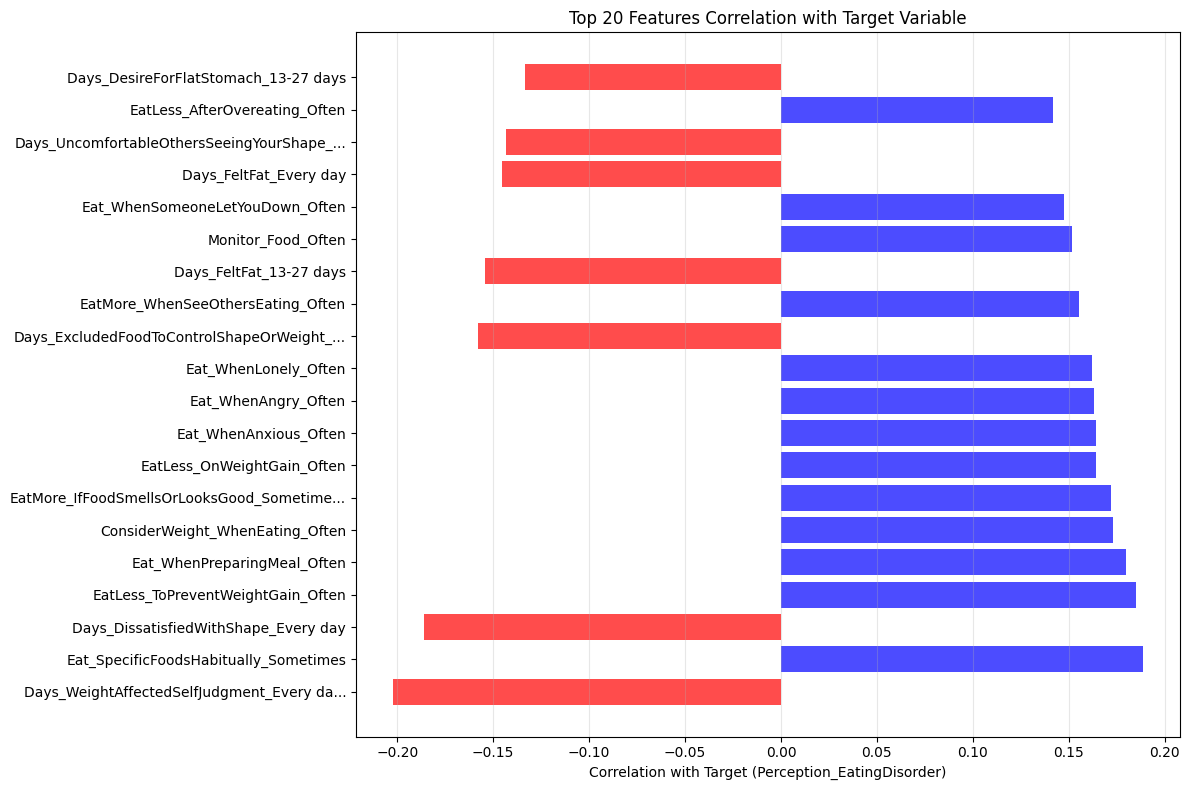


Summary statistics of target correlations:
Mean absolute correlation: 0.0721
Max correlation: 0.1885
Min correlation: -0.2021
Number of positive correlations: 62
Number of negative correlations: 107


In [13]:
# Save target correlations to CSV
target_corr_df = pd.DataFrame({
    'Feature': target_correlations.index,
    'Correlation_with_Target': target_correlations.values,
    'Abs_Correlation': abs(target_correlations.values)
}).sort_values('Abs_Correlation', ascending=False)

target_corr_df.to_csv('target_variable_correlations.csv', index=False)
print("Target correlations saved to 'target_variable_correlations.csv'")

# Visualize correlation with target
plt.figure(figsize=(12, 8))
top_20_corr = target_correlations.head(20)
colors = ['red' if x < 0 else 'blue' for x in top_20_corr.values]
bars = plt.barh(range(len(top_20_corr)), top_20_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_20_corr)), [name[:40] + '...' if len(name) > 40 else name for name in top_20_corr.index])
plt.xlabel('Correlation with Target (Perception_EatingDisorder)')
plt.title('Top 20 Features Correlation with Target Variable')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSummary statistics of target correlations:")
print(f"Mean absolute correlation: {abs(target_correlations).mean():.4f}")
print(f"Max correlation: {target_correlations.max():.4f}")
print(f"Min correlation: {target_correlations.min():.4f}")
print(f"Number of positive correlations: {(target_correlations > 0).sum()}")
print(f"Number of negative correlations: {(target_correlations < 0).sum()}")

In [44]:
# Feature-to-feature correlation matrix (excluding target)
features_only = X_encoded  # Features without target
feature_correlation_matrix = features_only.corr()

# Find highly correlated feature pairs (excluding self-correlations)
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlation = corr_matrix.iloc[i, j]
            if abs(correlation) >= threshold:
                high_corr_pairs.append({
                    'Feature1': corr_matrix.columns[i],
                    'Feature2': corr_matrix.columns[j],
                    'Correlation': correlation
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)

high_corr_df = find_high_correlations(feature_correlation_matrix, threshold=0.7)
print(f"Found {len(high_corr_df)} feature pairs with correlation >= 0.7")

if len(high_corr_df) > 0:
    print("\nTop 10 highly correlated feature pairs:")
    print(high_corr_df.head(10))
else:
    print("\nNo feature pairs with correlation >= 0.7 found")
    # Try lower threshold
    high_corr_df = find_high_correlations(feature_correlation_matrix, threshold=0.5)
    print(f"\nFound {len(high_corr_df)} feature pairs with correlation >= 0.5")
    if len(high_corr_df) > 0:
        print("\nTop 10 moderately correlated feature pairs:")
        print(high_corr_df.head(10))

Found 44 feature pairs with correlation >= 0.7

Top 10 highly correlated feature pairs:
                                         Feature1  \
27               ConsiderWeight_WhenEating_Seldom   
12                       Eat_SlimmingFoods_Seldom   
28            ConsiderWeight_WhenEating_Sometimes   
13                    Eat_SlimmingFoods_Sometimes   
15                 EatLess_AfterOvereating_Seldom   
29           Days_DesireForFlatStomach_13-27 days   
26                ConsiderWeight_WhenEating_Often   
11                        Eat_SlimmingFoods_Often   
6                 RefuseFood_WeightConcern_Seldom   
25  AvoidEveningEating_ForWeightConcern_Sometimes   

                                             Feature2  Correlation  
27                       Eat_WhenPreparingMeal_Seldom     1.000000  
12                      DesireToBuy_FromBakery_Seldom     0.995163  
28                    Eat_WhenPreparingMeal_Sometimes     0.994732  
13                   DesireToBuy_FromBakery_Sometime

# Step 3: Clustering Analysis for Positive Cases

Now we'll perform clustering analysis on samples where the target variable is positive (Yes = 1)

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

# Filter positive cases (target = 1, which means "Yes")
positive_cases = df_final[df_final['target'] == 1].copy()
positive_features = positive_cases.drop('target', axis=1)

print(f"Total samples: {len(df_final)}")
print(f"Positive cases (Yes): {len(positive_cases)}")
print(f"Negative cases (No): {len(df_final) - len(positive_cases)}")
print(f"Positive cases percentage: {len(positive_cases)/len(df_final)*100:.2f}%")

# Scale the features for clustering
scaler = StandardScaler()
positive_features_scaled = scaler.fit_transform(positive_features)

print(f"\nFeatures shape for clustering: {positive_features_scaled.shape}")
print(f"Features for positive cases: {positive_features.shape[1]} features")

Total samples: 550
Positive cases (Yes): 296
Negative cases (No): 254
Positive cases percentage: 53.82%

Features shape for clustering: (296, 169)
Features for positive cases: 169 features


In [8]:
# Determine optimal number of clusters using Elbow method and Silhouette score
k_range = range(2, 11)
inertias = []
silhouette_scores = []
calinski_scores = []

print("Testing different numbers of clusters...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(positive_features_scaled)
    
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    sil_score = silhouette_score(positive_features_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    
    # Calculate Calinski-Harabasz score
    cal_score = calinski_harabasz_score(positive_features_scaled, cluster_labels)
    calinski_scores.append(cal_score)
    
    print(f"K={k}: Silhouette={sil_score:.3f}, Calinski-Harabasz={cal_score:.1f}")

# Find best K based on silhouette score
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_calinski = k_range[np.argmax(calinski_scores)]

print(f"\nBest K based on Silhouette score: {best_k_silhouette} (score: {max(silhouette_scores):.3f})")
print(f"Best K based on Calinski-Harabasz score: {best_k_calinski} (score: {max(calinski_scores):.1f})")

Testing different numbers of clusters...
K=2: Silhouette=0.024, Calinski-Harabasz=7.0
K=3: Silhouette=0.024, Calinski-Harabasz=6.8
K=2: Silhouette=0.024, Calinski-Harabasz=7.0
K=3: Silhouette=0.024, Calinski-Harabasz=6.8
K=4: Silhouette=0.020, Calinski-Harabasz=5.8
K=5: Silhouette=0.019, Calinski-Harabasz=5.1
K=4: Silhouette=0.020, Calinski-Harabasz=5.8
K=5: Silhouette=0.019, Calinski-Harabasz=5.1
K=6: Silhouette=0.019, Calinski-Harabasz=4.7
K=7: Silhouette=0.015, Calinski-Harabasz=4.3
K=6: Silhouette=0.019, Calinski-Harabasz=4.7
K=7: Silhouette=0.015, Calinski-Harabasz=4.3
K=8: Silhouette=0.016, Calinski-Harabasz=3.9
K=8: Silhouette=0.016, Calinski-Harabasz=3.9
K=9: Silhouette=0.015, Calinski-Harabasz=3.8
K=10: Silhouette=0.015, Calinski-Harabasz=3.6

Best K based on Silhouette score: 2 (score: 0.024)
Best K based on Calinski-Harabasz score: 2 (score: 7.0)
K=9: Silhouette=0.015, Calinski-Harabasz=3.8
K=10: Silhouette=0.015, Calinski-Harabasz=3.6

Best K based on Silhouette score: 2 (s

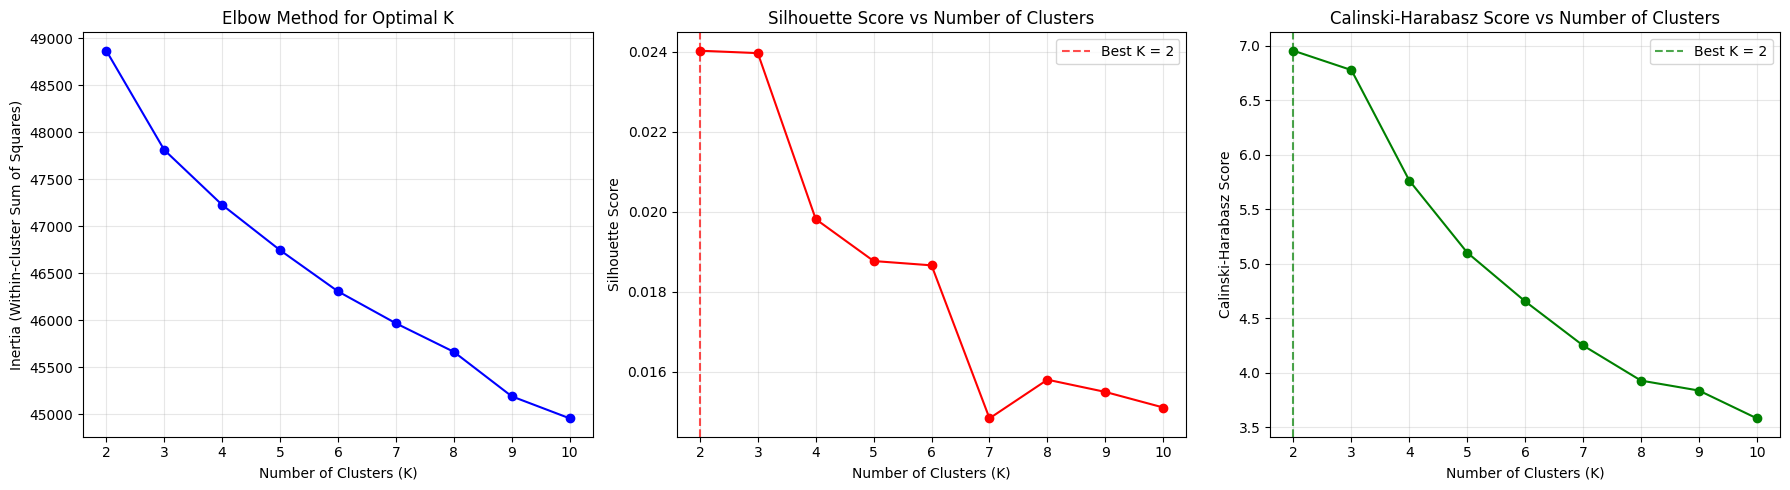


Selected optimal number of clusters: 2


In [14]:
# Visualize the cluster evaluation metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow curve
axes[0].plot(k_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].axvline(x=best_k_silhouette, color='red', linestyle='--', alpha=0.7, label=f'Best K = {best_k_silhouette}')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs Number of Clusters')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Calinski-Harabasz scores
axes[2].plot(k_range, calinski_scores, 'go-')
axes[2].axvline(x=best_k_calinski, color='green', linestyle='--', alpha=0.7, label=f'Best K = {best_k_calinski}')
axes[2].set_xlabel('Number of Clusters (K)')
axes[2].set_ylabel('Calinski-Harabasz Score')
axes[2].set_title('Calinski-Harabasz Score vs Number of Clusters')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose the best K (using silhouette score as primary metric)
optimal_k = best_k_silhouette
print(f"\nSelected optimal number of clusters: {optimal_k}")

In [15]:
# Apply final clustering with optimal K
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(positive_features_scaled)

# Add cluster labels to the positive cases dataframe
positive_cases_clustered = positive_cases.copy()
positive_cases_clustered['cluster'] = cluster_labels

print(f"Clustering completed with {optimal_k} clusters")
print(f"\nCluster distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = count / len(cluster_labels) * 100
    print(f"  Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")

# Final silhouette score
final_silhouette = silhouette_score(positive_features_scaled, cluster_labels)
print(f"\nFinal silhouette score: {final_silhouette:.3f}")

Clustering completed with 2 clusters

Cluster distribution:
  Cluster 0: 231 samples (78.0%)
  Cluster 1: 65 samples (22.0%)

Final silhouette score: 0.024


In [17]:
# Analyze cluster characteristics - Top and Least features for each cluster
def analyze_cluster_features(cluster_data, feature_names, n_top=10):
    """Analyze top and least important features for each cluster"""
    
    cluster_analysis = {}
    overall_mean = cluster_data.drop(['cluster', 'target'], axis=1).mean()
    
    for cluster_id in sorted(cluster_data['cluster'].unique()):
        cluster_mask = cluster_data['cluster'] == cluster_id
        cluster_features = cluster_data[cluster_mask].drop(['cluster', 'target'], axis=1)
        cluster_mean = cluster_features.mean()
        
        # Calculate how much each feature deviates from overall mean
        deviations = cluster_mean - overall_mean
        
        # Top positive deviations (most above average)
        top_positive = deviations.nlargest(n_top)
        # Top negative deviations (most below average) 
        top_negative = deviations.nsmallest(n_top)
        
        cluster_analysis[cluster_id] = {
            'size': cluster_mask.sum(),
            'top_features': top_positive,
            'least_features': top_negative,
            'cluster_mean': cluster_mean
        }
    
    return cluster_analysis

# Perform cluster analysis
cluster_analysis = analyze_cluster_features(positive_cases_clustered, positive_features.columns)

print("="*80)
print("CLUSTER ANALYSIS RESULTS")
print("="*80)

for cluster_id, analysis in cluster_analysis.items():
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} (n={analysis['size']} samples)")
    print(f"{'='*50}")
    
    print(f"\nTOP 10 FEATURES (Most Above Average):")
    for i, (feature, value) in enumerate(analysis['top_features'].items(), 1):
        print(f"  {i:2d}. {feature:<50} (+{value:+.4f})")
    
    print(f"\nTOP 10 LEAST FEATURES (Most Below Average):")
    for i, (feature, value) in enumerate(analysis['least_features'].items(), 1):
        print(f"  {i:2d}. {feature:<50} ({value:+.4f})")

CLUSTER ANALYSIS RESULTS

CLUSTER 0 (n=231 samples)

TOP 10 FEATURES (Most Above Average):
   1. RefuseFood_WeightConcern_Often                     (++0.0879)
   2. Eat_WhenSeeDeliciousFood_Often                     (++0.0874)
   3. RefuseFood_WeightConcern_Seldom                    (++0.0641)
   4. Eat_WhenSeeDeliciousFood_Seldom                    (++0.0622)
   5. EatLess_AfterOvereating_Often                      (++0.0485)
   6. DesireToBuy _FromSnackBarOrCafe_Often              (++0.0438)
   7. current_city_Sylhet                                (++0.0409)
   8. Days_DissatisfiedWithShape_13-27 days              (++0.0393)
   9. EatMore_IfFoodSmellsOrLooksGood_Seldom             (++0.0339)
  10. current_city_Chattogram                            (++0.0333)

TOP 10 LEAST FEATURES (Most Below Average):
   1. RefuseFood_WeightConcern_Sometimes                 (-0.1950)
   2. Eat_WhenSeeDeliciousFood_Sometimes                 (-0.1926)
   3. current_city_Rajshahi                       

In [50]:
# Save cluster analysis results to CSV
cluster_results_list = []

for cluster_id, analysis in cluster_analysis.items():
    # Top features
    for rank, (feature, deviation) in enumerate(analysis['top_features'].items(), 1):
        cluster_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Top',
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })
    
    # Least features
    for rank, (feature, deviation) in enumerate(analysis['least_features'].items(), 1):
        cluster_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Least', 
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })

cluster_results_df = pd.DataFrame(cluster_results_list)
cluster_results_df.to_csv('cluster_analysis_results.csv', index=False)

print(f"\nCluster analysis results saved to 'cluster_analysis_results.csv'")
print(f"Total records in analysis: {len(cluster_results_df)}")

# Summary statistics
print(f"\nSUMMARY:")
print(f"- Total positive cases analyzed: {len(positive_cases_clustered)}")
print(f"- Number of clusters found: {optimal_k}")
print(f"- Total features analyzed: {len(positive_features.columns)}")
print(f"- Silhouette score: {final_silhouette:.3f}")

print("\nCluster sizes:")
for cluster_id, analysis in cluster_analysis.items():
    percentage = (analysis['size'] / len(positive_cases_clustered)) * 100
    print(f"  Cluster {cluster_id}: {analysis['size']} samples ({percentage:.1f}%)")


Cluster analysis results saved to 'cluster_analysis_results.csv'
Total records in analysis: 40

SUMMARY:
- Total positive cases analyzed: 296
- Number of clusters found: 2
- Total features analyzed: 169
- Silhouette score: 0.024

Cluster sizes:
  Cluster 0: 231 samples (78.0%)
  Cluster 1: 65 samples (22.0%)


## PCA Visualization of Clusters

Let's visualize the clusters in 2D using Principal Component Analysis (PCA)

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2, random_state=42)
positive_features_pca = pca.fit_transform(positive_features_scaled)

print(f"PCA Explained Variance Ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total explained variance: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")

# Create DataFrame for visualization
pca_df = pd.DataFrame({
    'PC1': positive_features_pca[:, 0],
    'PC2': positive_features_pca[:, 1],
    'Cluster': cluster_labels
})

print(f"\nPCA components shape: {positive_features_pca.shape}")
print(f"PCA DataFrame shape: {pca_df.shape}")

PCA Explained Variance Ratio:
  PC1: 0.0299 (2.99%)
  PC2: 0.0294 (2.94%)
  Total explained variance: 0.0592 (5.92%)

PCA components shape: (296, 2)
PCA DataFrame shape: (296, 3)


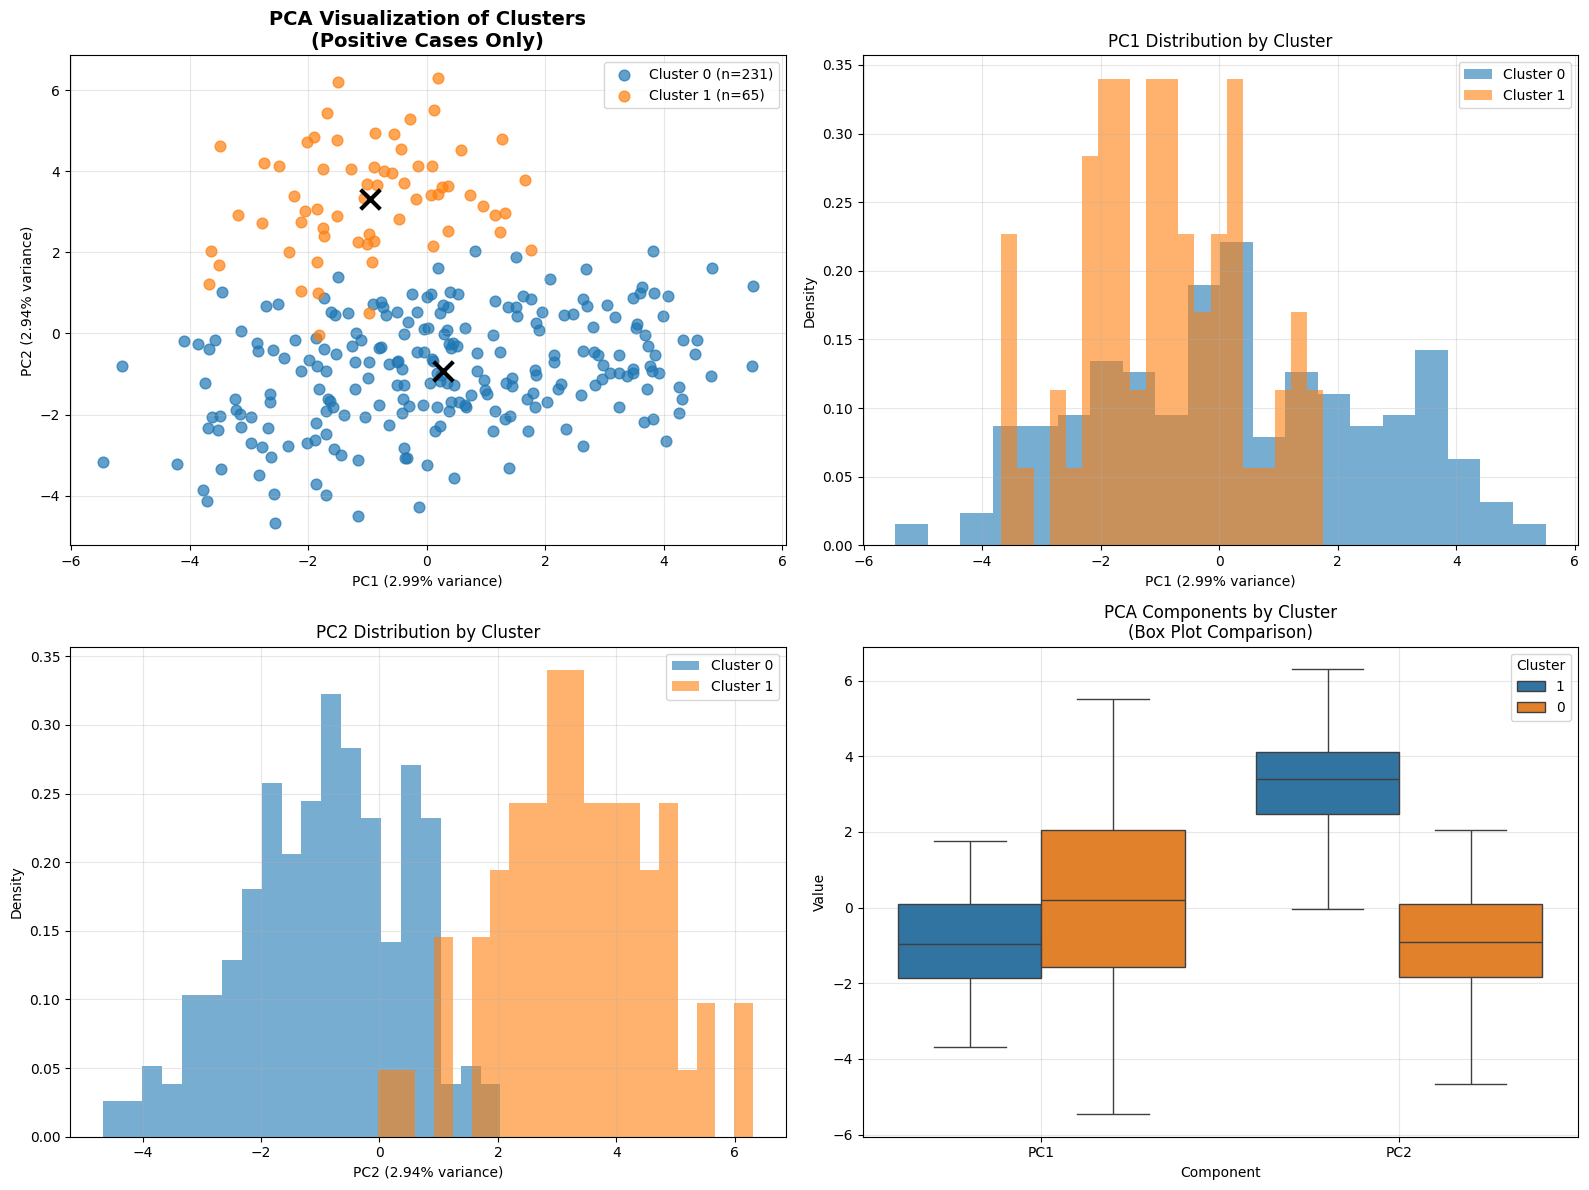

In [22]:
# Create comprehensive PCA visualization
plt.figure(figsize=(16, 12))

# Define colors for clusters
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
cluster_names = [f'Cluster {i}' for i in range(optimal_k)]

# Main PCA scatter plot
plt.subplot(2, 2, 1)
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    cluster_size = cluster_mask.sum()
    plt.scatter(pca_df.loc[cluster_mask, 'PC1'], 
               pca_df.loc[cluster_mask, 'PC2'],
               c=cluster_colors[i], 
               label=f'{cluster_names[i]} (n={cluster_size})',
               alpha=0.7, 
               s=60)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA Visualization of Clusters\n(Positive Cases Only)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add cluster centers
cluster_centers_pca = pca.transform(final_kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], 
               c='black', marker='x', s=200, linewidth=3,
               label='Centroids' if i == 0 else "")

# Density plot for PC1
plt.subplot(2, 2, 2)
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    plt.hist(pca_df.loc[cluster_mask, 'PC1'], 
             bins=20, alpha=0.6, 
             color=cluster_colors[i], 
             label=cluster_names[i],
             density=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC1 Distribution by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Density plot for PC2
plt.subplot(2, 2, 3)
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    plt.hist(pca_df.loc[cluster_mask, 'PC2'], 
             bins=20, alpha=0.6, 
             color=cluster_colors[i], 
             label=cluster_names[i],
             density=True)
plt.xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC2 Distribution by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot comparison
plt.subplot(2, 2, 4)
pca_melted = pca_df.melt(id_vars=['Cluster'], value_vars=['PC1', 'PC2'], 
                        var_name='Component', value_name='Value')
pca_melted['Cluster'] = pca_melted['Cluster'].astype(str)
sns.boxplot(data=pca_melted, x='Component', y='Value', hue='Cluster', palette=cluster_colors[:optimal_k])
plt.title('PCA Components by Cluster\n(Box Plot Comparison)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

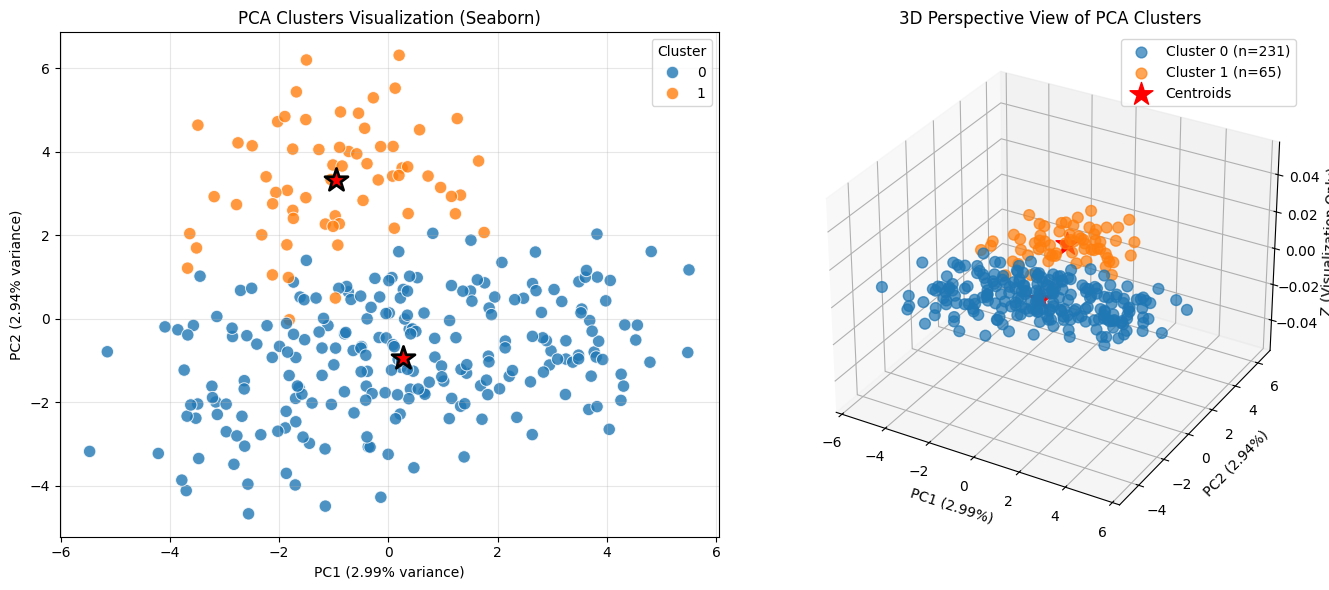

In [53]:
# Alternative PCA visualization with Seaborn
plt.figure(figsize=(14, 6))

# Seaborn scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', 
               palette=cluster_colors[:optimal_k], s=80, alpha=0.8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA Clusters Visualization (Seaborn)')
plt.grid(True, alpha=0.3)

# Add cluster centers
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], 
               c='red', marker='*', s=300, 
               edgecolors='black', linewidth=2,
               label='Centroids' if i == 0 else "")

# 3D PCA visualization (even though we only have 2 components, we can show it in 3D perspective)
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(1, 2, 2, projection='3d')

for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    cluster_size = cluster_mask.sum()
    ax.scatter(pca_df.loc[cluster_mask, 'PC1'], 
              pca_df.loc[cluster_mask, 'PC2'],
              np.zeros(cluster_size),  # Z-axis as 0 since we only have 2 components
              c=cluster_colors[i], 
              label=f'Cluster {i} (n={cluster_size})',
              alpha=0.7, s=60)

# Add cluster centers in 3D
for i, center in enumerate(cluster_centers_pca):
    ax.scatter(center[0], center[1], 0, 
              c='red', marker='*', s=300,
              label='Centroids' if i == 0 else "")

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel('Z (Visualization Only)')
ax.set_title('3D Perspective View of PCA Clusters')
ax.legend()

plt.tight_layout()
plt.show()

In [54]:
# Statistical analysis of PCA results
print("="*70)
print("PCA CLUSTER ANALYSIS SUMMARY")
print("="*70)

print(f"\nPCA Configuration:")
print(f"- Original features: {positive_features.shape[1]} dimensions")
print(f"- Reduced to: 2 dimensions")
print(f"- Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print(f"\nPCA Component Analysis:")
print(f"- PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"- PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")

# Calculate cluster statistics in PCA space
print(f"\nCluster Statistics in PCA Space:")
for i in range(optimal_k):
    cluster_data_pca = pca_df[pca_df['Cluster'] == i]
    
    print(f"\nCluster {i} (n={len(cluster_data_pca)}):")
    print(f"  PC1 - Mean: {cluster_data_pca['PC1'].mean():.3f}, Std: {cluster_data_pca['PC1'].std():.3f}")
    print(f"  PC2 - Mean: {cluster_data_pca['PC2'].mean():.3f}, Std: {cluster_data_pca['PC2'].std():.3f}")
    
    # Calculate distance from origin
    distances = np.sqrt(cluster_data_pca['PC1']**2 + cluster_data_pca['PC2']**2)
    print(f"  Distance from origin - Mean: {distances.mean():.3f}, Std: {distances.std():.3f}")

# Calculate separation between cluster centers
if optimal_k == 2:
    center_distance = np.sqrt((cluster_centers_pca[0][0] - cluster_centers_pca[1][0])**2 + 
                             (cluster_centers_pca[0][1] - cluster_centers_pca[1][1])**2)
    print(f"\nCluster Separation:")
    print(f"- Distance between cluster centers: {center_distance:.3f}")
    print(f"- Cluster centers in PCA space:")
    for i, center in enumerate(cluster_centers_pca):
        print(f"  Cluster {i}: PC1={center[0]:.3f}, PC2={center[1]:.3f}")

print(f"\nInterpretation:")
print(f"- Clusters are {'well separated' if center_distance > 1.0 else 'moderately separated' if center_distance > 0.5 else 'close together'} in PCA space")
print(f"- The first two principal components capture {sum(pca.explained_variance_ratio_)*100:.1f}% of the total variance")
print(f"- This suggests {'good' if sum(pca.explained_variance_ratio_) > 0.5 else 'moderate' if sum(pca.explained_variance_ratio_) > 0.3 else 'limited'} dimensionality reduction effectiveness")

PCA CLUSTER ANALYSIS SUMMARY

PCA Configuration:
- Original features: 169 dimensions
- Reduced to: 2 dimensions
- Total variance explained: 5.92%

PCA Component Analysis:
- PC1 explains 2.99% of variance
- PC2 explains 2.94% of variance

Cluster Statistics in PCA Space:

Cluster 0 (n=231):
  PC1 - Mean: 0.270, Std: 2.380
  PC2 - Mean: -0.936, Std: 1.375
  Distance from origin - Mean: 2.590, Std: 1.332

Cluster 1 (n=65):
  PC1 - Mean: -0.959, Std: 1.339
  PC2 - Mean: 3.326, Std: 1.320
  Distance from origin - Mean: 3.774, Std: 1.114

Cluster Separation:
- Distance between cluster centers: 4.436
- Cluster centers in PCA space:
  Cluster 0: PC1=0.270, PC2=-0.936
  Cluster 1: PC1=-0.959, PC2=3.326

Interpretation:
- Clusters are well separated in PCA space
- The first two principal components capture 5.9% of the total variance
- This suggests limited dimensionality reduction effectiveness


# Additional Analysis: Testing with K=3 Clusters

In [18]:
# Test clustering with K=3 specifically
k3_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k3_cluster_labels = k3_kmeans.fit_predict(positive_features_scaled)

# Calculate metrics for K=3
k3_silhouette = silhouette_score(positive_features_scaled, k3_cluster_labels)
k3_calinski = calinski_harabasz_score(positive_features_scaled, k3_cluster_labels)

print(f"Results for K=3 clusters:")
print(f"- Silhouette score: {k3_silhouette:.4f}")
print(f"- Calinski-Harabasz score: {k3_calinski:.1f}")
print(f"- Inertia: {k3_kmeans.inertia_:.2f}")

# Cluster distribution for K=3
print(f"\nCluster distribution for K=3:")
k3_cluster_counts = pd.Series(k3_cluster_labels).value_counts().sort_index()
for cluster_id, count in k3_cluster_counts.items():
    percentage = count / len(k3_cluster_labels) * 100
    print(f"  Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")

# Compare with optimal K
print(f"\nComparison:")
print(f"  Optimal K={optimal_k}: Silhouette={final_silhouette:.4f}")
print(f"  K=3: Silhouette={k3_silhouette:.4f}")
print(f"  Difference: {k3_silhouette - final_silhouette:.4f}")

Results for K=3 clusters:
- Silhouette score: 0.0240
- Calinski-Harabasz score: 6.8
- Inertia: 47812.40

Cluster distribution for K=3:
  Cluster 0: 128 samples (43.2%)
  Cluster 1: 61 samples (20.6%)
  Cluster 2: 107 samples (36.1%)

Comparison:
  Optimal K=2: Silhouette=0.0240
  K=3: Silhouette=0.0240
  Difference: -0.0001


In [19]:
# Analyze K=3 cluster characteristics
def analyze_k3_clusters(cluster_data, cluster_labels, feature_names, n_top=10):
    """Analyze features for K=3 clustering"""
    
    # Create temporary dataframe with K=3 clusters
    temp_df = cluster_data.copy()
    temp_df['cluster_k3'] = cluster_labels
    
    cluster_analysis_k3 = {}
    overall_mean = temp_df.drop(['cluster', 'target', 'cluster_k3'], axis=1).mean()
    
    for cluster_id in range(3):
        cluster_mask = temp_df['cluster_k3'] == cluster_id
        cluster_features = temp_df[cluster_mask].drop(['cluster', 'target', 'cluster_k3'], axis=1)
        cluster_mean = cluster_features.mean()
        
        # Calculate deviations from overall mean
        deviations = cluster_mean - overall_mean
        
        top_positive = deviations.nlargest(n_top)
        top_negative = deviations.nsmallest(n_top)
        
        cluster_analysis_k3[cluster_id] = {
            'size': cluster_mask.sum(),
            'top_features': top_positive,
            'least_features': top_negative,
            'cluster_mean': cluster_mean
        }
    
    return cluster_analysis_k3

# Perform K=3 cluster analysis
k3_analysis = analyze_k3_clusters(positive_cases_clustered, k3_cluster_labels, positive_features.columns)

print("="*80)
print("K=3 CLUSTER ANALYSIS RESULTS")
print("="*80)

for cluster_id, analysis in k3_analysis.items():
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} (n={analysis['size']} samples)")
    print(f"{'='*50}")
    
    print(f"\nTOP 5 FEATURES (Most Above Average):")
    for i, (feature, value) in enumerate(analysis['top_features'].head(5).items(), 1):
        print(f"  {i}. {feature:<50} (+{value:+.4f})")
    
    print(f"\nTOP 5 LEAST FEATURES (Most Below Average):")
    for i, (feature, value) in enumerate(analysis['least_features'].head(5).items(), 1):
        print(f"  {i}. {feature:<50} ({value:+.4f})")

K=3 CLUSTER ANALYSIS RESULTS

CLUSTER 0 (n=128 samples)

TOP 5 FEATURES (Most Above Average):
  1. RefuseFood_WeightConcern_Often                     (++0.3832)
  2. Eat_WhenSeeDeliciousFood_Often                     (++0.3697)
  3. current_city_Mymensingh                            (++0.1463)
  4. current_city_Khulna                                (++0.1296)
  5. DesireToBuy _FromSnackBarOrCafe_Often              (++0.1144)

TOP 5 LEAST FEATURES (Most Below Average):
  1. RefuseFood_WeightConcern_Seldom                    (-0.2354)
  2. Eat_WhenSeeDeliciousFood_Seldom                    (-0.2287)
  3. RefuseFood_WeightConcern_Sometimes                 (-0.1993)
  4. Eat_WhenSeeDeliciousFood_Sometimes                 (-0.1926)
  5. current_city_Sylhet                                (-0.1140)

CLUSTER 1 (n=61 samples)

TOP 5 FEATURES (Most Above Average):
  1. RefuseFood_WeightConcern_Sometimes                 (++0.7515)
  2. Eat_WhenSeeDeliciousFood_Sometimes                 (++0.7419)

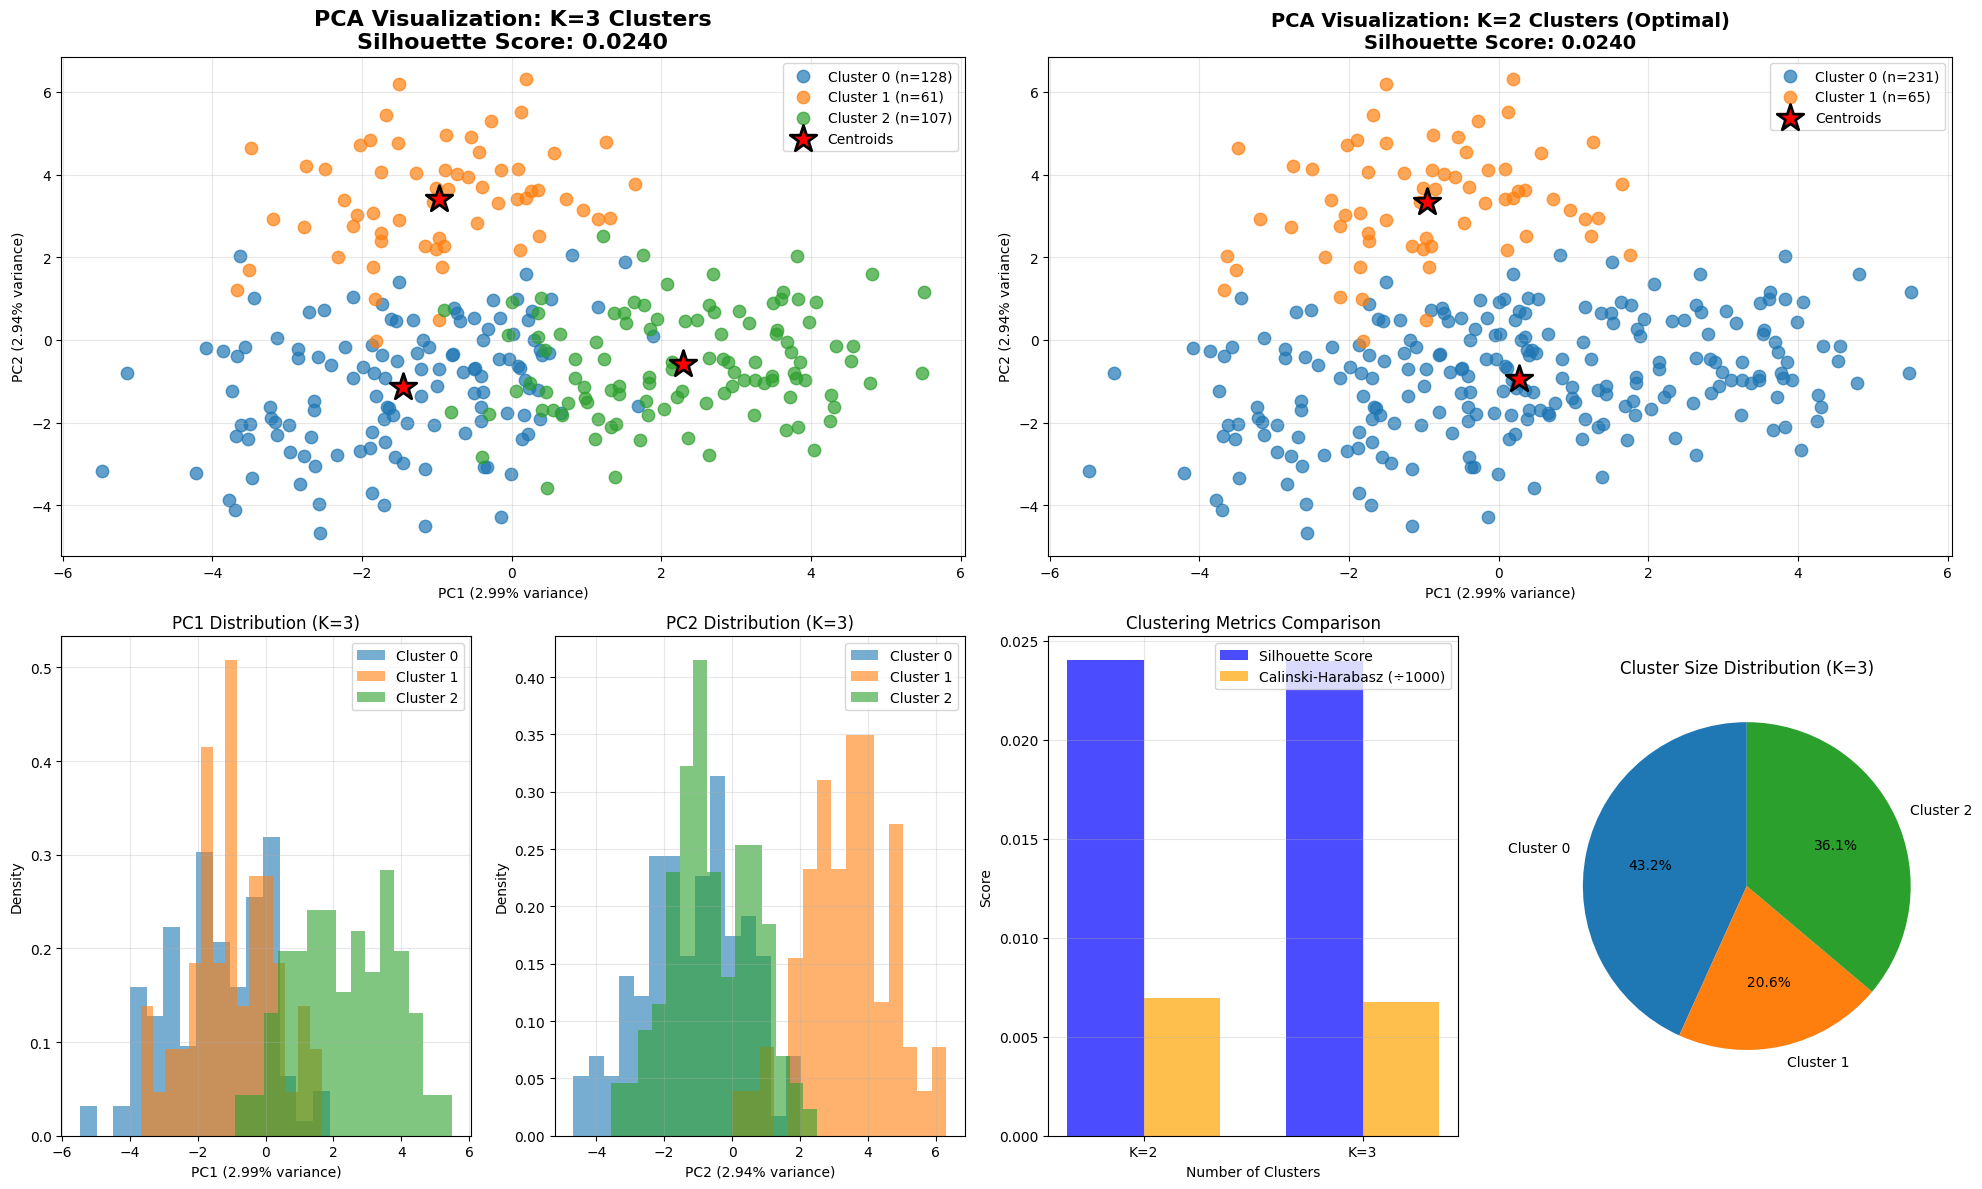

In [23]:
# PCA Visualization for K=3 Clusters
# Create DataFrame for K=3 visualization
pca_df_k3 = pd.DataFrame({
    'PC1': positive_features_pca[:, 0],
    'PC2': positive_features_pca[:, 1], 
    'Cluster_K3': k3_cluster_labels
})

# Define colors for 3 clusters
k3_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
k3_cluster_names = [f'Cluster {i}' for i in range(3)]

# Create comprehensive visualization comparing K=3 with optimal K
fig = plt.figure(figsize=(20, 12))

# Main K=3 plot
ax1 = plt.subplot(2, 4, (1, 2))
for i in range(3):
    cluster_mask = pca_df_k3['Cluster_K3'] == i
    cluster_size = cluster_mask.sum()
    plt.scatter(pca_df_k3.loc[cluster_mask, 'PC1'], 
               pca_df_k3.loc[cluster_mask, 'PC2'],
               c=k3_colors[i], 
               label=f'{k3_cluster_names[i]} (n={cluster_size})',
               alpha=0.7, 
               s=80)

# Add K=3 cluster centers
k3_centers_pca = pca.transform(k3_kmeans.cluster_centers_)
for i, center in enumerate(k3_centers_pca):
    plt.scatter(center[0], center[1], 
               c='red', marker='*', s=400, 
               edgecolors='black', linewidth=2,
               label='Centroids' if i == 0 else "")

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title(f'PCA Visualization: K=3 Clusters\nSilhouette Score: {k3_silhouette:.4f}', 
          fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparison with optimal K
ax2 = plt.subplot(2, 4, (3, 4))
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    cluster_size = cluster_mask.sum()
    plt.scatter(pca_df.loc[cluster_mask, 'PC1'], 
               pca_df.loc[cluster_mask, 'PC2'],
               c=cluster_colors[i], 
               label=f'Cluster {i} (n={cluster_size})',
               alpha=0.7, 
               s=80)

# Add optimal K cluster centers
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], 
               c='red', marker='*', s=400,
               edgecolors='black', linewidth=2,
               label='Centroids' if i == 0 else "")

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title(f'PCA Visualization: K={optimal_k} Clusters (Optimal)\nSilhouette Score: {final_silhouette:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# PC1 distribution for K=3
plt.subplot(2, 4, 5)
for i in range(3):
    cluster_mask = pca_df_k3['Cluster_K3'] == i
    plt.hist(pca_df_k3.loc[cluster_mask, 'PC1'], 
             bins=15, alpha=0.6, 
             color=k3_colors[i], 
             label=f'Cluster {i}',
             density=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC1 Distribution (K=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# PC2 distribution for K=3
plt.subplot(2, 4, 6)
for i in range(3):
    cluster_mask = pca_df_k3['Cluster_K3'] == i
    plt.hist(pca_df_k3.loc[cluster_mask, 'PC2'], 
             bins=15, alpha=0.6, 
             color=k3_colors[i], 
             label=f'Cluster {i}',
             density=True)
plt.xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC2 Distribution (K=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# Metrics comparison
plt.subplot(2, 4, 7)
metrics_comparison = pd.DataFrame({
    'K': [optimal_k, 3],
    'Silhouette_Score': [final_silhouette, k3_silhouette],
    'Calinski_Harabasz': [calinski_scores[optimal_k-2], k3_calinski]
})

x = np.arange(len(metrics_comparison))
width = 0.35

plt.bar(x - width/2, metrics_comparison['Silhouette_Score'], width, 
        label='Silhouette Score', alpha=0.7, color='blue')
plt.bar(x + width/2, metrics_comparison['Calinski_Harabasz']/1000, width, 
        label='Calinski-Harabasz (÷1000)', alpha=0.7, color='orange')

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Clustering Metrics Comparison')
plt.xticks(x, [f'K={optimal_k}', 'K=3'])
plt.legend()
plt.grid(True, alpha=0.3)

# Cluster size comparison
plt.subplot(2, 4, 8)
cluster_sizes_k3 = [k3_analysis[i]['size'] for i in range(3)]

plt.pie(cluster_sizes_k3, labels=[f'Cluster {i}' for i in range(3)], 
        colors=k3_colors, autopct='%1.1f%%', startangle=90)
plt.title('Cluster Size Distribution (K=3)')

plt.tight_layout()
plt.show()

In [24]:
# Statistical Analysis and Summary for K=3
print("="*80)
print("STATISTICAL ANALYSIS: K=3 vs OPTIMAL K COMPARISON")
print("="*80)

print(f"\nClustering Performance Metrics:")
print(f"{'Metric':<25} {'K=' + str(optimal_k):<15} {'K=3':<15} {'Better':<10}")
print("-" * 70)
print(f"{'Silhouette Score':<25} {final_silhouette:<15.4f} {k3_silhouette:<15.4f} {'K=' + str(optimal_k if final_silhouette > k3_silhouette else '3'):<10}")
print(f"{'Calinski-Harabasz':<25} {calinski_scores[optimal_k-2]:<15.1f} {k3_calinski:<15.1f} {'K=' + str(optimal_k if calinski_scores[optimal_k-2] > k3_calinski else '3'):<10}")

print(f"\nCluster Statistics Comparison:")

# K=3 cluster statistics
print(f"\nK=3 Cluster Statistics:")
for i in range(3):
    cluster_data_k3 = pca_df_k3[pca_df_k3['Cluster_K3'] == i]
    print(f"  Cluster {i} (n={len(cluster_data_k3)}):")
    print(f"    PC1: μ={cluster_data_k3['PC1'].mean():.3f}, σ={cluster_data_k3['PC1'].std():.3f}")
    print(f"    PC2: μ={cluster_data_k3['PC2'].mean():.3f}, σ={cluster_data_k3['PC2'].std():.3f}")

# Calculate inter-cluster distances for K=3
print(f"\nK=3 Cluster Separation Analysis:")
for i in range(3):
    for j in range(i+1, 3):
        distance = np.sqrt((k3_centers_pca[i][0] - k3_centers_pca[j][0])**2 + 
                          (k3_centers_pca[i][1] - k3_centers_pca[j][1])**2)
        print(f"  Distance between Cluster {i} and Cluster {j}: {distance:.3f}")

# Overall assessment
print(f"\nOverall Assessment:")
if k3_silhouette > final_silhouette:
    print(f"✓ K=3 shows BETTER clustering quality (higher silhouette score)")
    print(f"  - Improvement: {k3_silhouette - final_silhouette:.4f}")
else:
    print(f"✗ K={optimal_k} shows BETTER clustering quality (higher silhouette score)")
    print(f"  - K=3 is worse by: {final_silhouette - k3_silhouette:.4f}")

print(f"\nRecommendation:")
if abs(k3_silhouette - final_silhouette) < 0.01:
    print("  The difference is minimal. Consider domain knowledge for final choice.")
elif k3_silhouette > final_silhouette:
    print("  K=3 appears to be a better choice for this dataset.")
else:
    print(f"  K={optimal_k} remains the better choice based on silhouette score.")

# Save K=3 results
k3_results_list = []
for cluster_id, analysis in k3_analysis.items():
    for rank, (feature, deviation) in enumerate(analysis['top_features'].items(), 1):
        k3_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Top',
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })
    
    for rank, (feature, deviation) in enumerate(analysis['least_features'].items(), 1):
        k3_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Least', 
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })

k3_results_df = pd.DataFrame(k3_results_list)
k3_results_df.to_csv('cluster_analysis_k3_results.csv', index=False)
print(f"\nK=3 cluster analysis saved to 'cluster_analysis_k3_results.csv'")

# Final summary
print(f"\nFinal Summary:")
print(f"- Original optimal K: {optimal_k} (Silhouette: {final_silhouette:.4f})")
print(f"- K=3 performance: Silhouette: {k3_silhouette:.4f}")
print(f"- Total positive cases: {len(positive_cases_clustered)}")
print(f"- PCA variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

STATISTICAL ANALYSIS: K=3 vs OPTIMAL K COMPARISON

Clustering Performance Metrics:
Metric                    K=2             K=3             Better    
----------------------------------------------------------------------
Silhouette Score          0.0240          0.0240          K=2       
Calinski-Harabasz         7.0             6.8             K=2       

Cluster Statistics Comparison:

K=3 Cluster Statistics:
  Cluster 0 (n=128):
    PC1: μ=-1.452, σ=1.492
    PC2: μ=-1.136, σ=1.510
  Cluster 1 (n=61):
    PC1: μ=-0.976, σ=1.252
    PC2: μ=3.419, σ=1.303
  Cluster 2 (n=107):
    PC1: μ=2.294, σ=1.463
    PC2: μ=-0.591, σ=1.233

K=3 Cluster Separation Analysis:
  Distance between Cluster 0 and Cluster 1: 4.579
  Distance between Cluster 0 and Cluster 2: 3.786
  Distance between Cluster 1 and Cluster 2: 5.174

Overall Assessment:
✗ K=2 shows BETTER clustering quality (higher silhouette score)
  - K=3 is worse by: 0.0001

Recommendation:
  The difference is minimal. Consider domain k